# Import Libraries

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

# Read in the file

In [49]:
DATA_PATH = 'car_mpg.csv'
df = pd.read_csv(DATA_PATH)

# Wrangle Data

In [52]:
def wrangle(filepath):
  # Read in the file
  df = pd.read_csv(filepath,
                   index_col = ['car_name'],
                   na_filter=[0.0])
  # Drop the rows with NaNs
  df = df.dropna(axis=0)
    
  # Change the data type of the horsepower feature to float64
  #df['horsepower'] = df['horsepower'].astype('float64')
  return df

df = wrangle(DATA_PATH)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [40]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
car_name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1
ford torino,17.0,8,302.0,140.0,3449,10.5,70,1


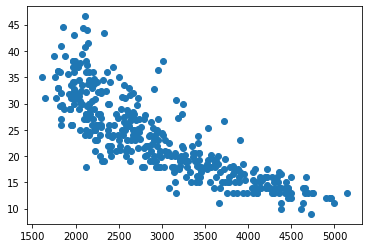

In [24]:
plt.scatter(df['weight'], df['mpg']);

# Establish Baseline

In [22]:
features = ['weight']
target = 'mpg'
X = df[features]
y = df[target]
X.shape, y.shape

((398, 1), (398,))

In [23]:
y_pred = [y.mean()] * len(y)

print('Baseline MAE: ', mean_absolute_error(y, y_pred))

Baseline MAE:  6.533395621322693


# Build a Model

In [25]:
# Step 1:  Choose the class of model
# from sklearn.linear_model import LinearRegression

# step 2:  Instantiate the class
model_lr = LinearRegression()

# Step 3:  Get feature(s) matrix and target vector
# Defined above

# Step 4: Fit the model to training set
model_lr.fit(X, y)

LinearRegression()

# Get Metrics

In [26]:
y_pred = model_lr.predict(X)

print('Linear Regression MAE: ', mean_absolute_error(y, y_pred))

Linear Regression MAE:  3.2927887935260554


# Conclusion

In [32]:
intercept = round(model_lr.intercept_, 1)
coef = round(model_lr.coef_[0],3)
print(f'MPG = {intercept} + {coef} * WEIGHT')

MPG = 46.3 + -0.008 * WEIGHT


In [29]:
model_lr.coef_

array([-0.00767661])

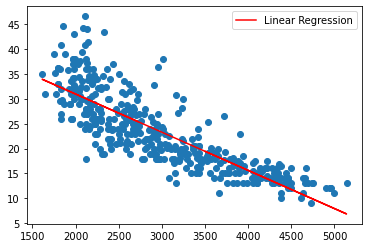

In [30]:
plt.scatter(df['weight'], df['mpg'])
plt.plot(X, y_pred, color='red', label='Linear Regression')
plt.legend();

# Linear Model with 2 Features

In [65]:
features = ['weight', 'model_year']
X = df[features]
X.shape, y.shape

((398, 2), (398,))

In [66]:
model2_lr = LinearRegression()

In [67]:
model2_lr.fit(X, y)

LinearRegression()

In [68]:
y_pred = model2_lr.predict(X)

print('Linear Regression with 2 numeric features MAE: ', mean_absolute_error(y, y_pred))

Linear Regression with 2 numeric features MAE:  2.620944206936792
